In [8]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Split the Data into Training and Testing Sets

### Step 1: Read the `heart.csv` data from the `static` folder into a Pandas DataFrame.

In [17]:
# Load dataset 
data = pd.read_csv('static/heart.csv')

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [18]:
print(data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [19]:
# List of columns to convert
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through the columns and create binary columns
for column in columns_to_convert:
    unique_values = data[column].unique()
    for value in unique_values:
        data[f'{column}_{value.lower()}'] = (data[column] == value).astype(int)

# Drop the original columns
data.drop(columns=columns_to_convert, inplace=True)

# print(data.head(10))

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   Sex_m  Sex_f  ChestPainType_ata  ...  ChestPainType_asy  ChestPainType_ta  \
0      1      0                  1  ...                  0                 0   
1      0      

In [22]:
# create a new variable to avoid confusion
data2 = data

data2.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_m,Sex_f,ChestPainType_ata,...,ChestPainType_asy,ChestPainType_ta,RestingECG_normal,RestingECG_st,RestingECG_lvh,ExerciseAngina_n,ExerciseAngina_y,ST_Slope_up,ST_Slope_flat,ST_Slope_down
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
3,48,138,214,0,108,1.5,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
5,39,120,339,0,170,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
6,45,130,237,0,170,0.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
7,54,110,208,0,142,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
8,37,140,207,0,130,1.5,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [23]:
print(data2.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_m', 'Sex_f', 'ChestPainType_ata',
       'ChestPainType_nap', 'ChestPainType_asy', 'ChestPainType_ta',
       'RestingECG_normal', 'RestingECG_st', 'RestingECG_lvh',
       'ExerciseAngina_n', 'ExerciseAngina_y', 'ST_Slope_up', 'ST_Slope_flat',
       'ST_Slope_down'],
      dtype='object')


In [24]:
data2.to_csv('heart_integer_v01.csv', index=False)

In [25]:
# Split into features (X) and target variable (y)
X = data2.drop('HeartDisease', axis=1)
y = data2['HeartDisease']

In [29]:
# SECOND SCALER - STANDARD
# Scale the data, using StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on your feature data
X_scaled1 = scaler.fit_transform(X)

In [30]:
import pandas as pd

# Create a DataFrame from the scaled features
X_scaled1_df = pd.DataFrame(X_scaled1, columns=X.columns)

# Display the first few rows of the scaled dataset
X_scaled1_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_m,Sex_f,ChestPainType_ata,ChestPainType_nap,ChestPainType_asy,ChestPainType_ta,RestingECG_normal,RestingECG_st,RestingECG_lvh,ExerciseAngina_n,ExerciseAngina_y,ST_Slope_up,ST_Slope_flat,ST_Slope_down
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.515952,-0.515952,2.075177,-0.532838,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,-1.938163,1.938163,-0.481887,1.876744,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,-0.869056,0.997824,-0.271448
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.515952,-0.515952,2.075177,-0.532838,-1.084138,-0.229679,-1.228087,2.038947,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,-1.938163,1.938163,-0.481887,-0.532838,0.922392,-0.229679,0.814275,-0.490449,-0.507478,-1.214246,1.214246,-0.869056,0.997824,-0.271448
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.515952,-0.515952,-0.481887,1.876744,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448
5,-1.539213,-0.669935,1.282424,-0.551341,1.304332,-0.832432,0.515952,-0.515952,-0.481887,1.876744,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448
6,-0.902775,-0.129513,0.349422,-0.551341,1.304332,-0.832432,-1.938163,1.938163,2.075177,-0.532838,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448
7,0.051881,-1.210356,0.084157,-0.551341,0.203982,-0.832432,0.515952,-0.515952,2.075177,-0.532838,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448
8,-1.751359,0.410909,0.075010,-0.551341,-0.267596,0.574711,0.515952,-0.515952,-0.481887,-0.532838,0.922392,-0.229679,0.814275,-0.490449,-0.507478,-1.214246,1.214246,-0.869056,0.997824,-0.271448
9,-0.584556,-0.669935,0.779335,-0.551341,-0.660578,-0.832432,-1.938163,1.938163,2.075177,-0.532838,-1.084138,-0.229679,0.814275,-0.490449,-0.507478,0.823556,-0.823556,1.150674,-1.002181,-0.271448


In [33]:
# StandardScaler to CSV
X_scaled1_df.to_csv('heart_scale_StandardScaler_v01.csv', index=False)

In [31]:
# SECOND SCALER - MINMAX
# Scale the data, using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on your feature data
X_scaled2 = scaler.fit_transform(X)

In [32]:
import pandas as pd

# Create a DataFrame from the scaled features
X_scaled2_df = pd.DataFrame(X_scaled2, columns=X.columns)

# Display the first few rows of the scaled dataset
X_scaled2_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_m,Sex_f,ChestPainType_ata,ChestPainType_nap,ChestPainType_asy,ChestPainType_ta,RestingECG_normal,RestingECG_st,RestingECG_lvh,ExerciseAngina_n,ExerciseAngina_y,ST_Slope_up,ST_Slope_flat,ST_Slope_down
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.224490,0.60,0.562189,0.0,0.774648,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.346939,0.65,0.393035,0.0,0.774648,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.530612,0.55,0.344942,0.0,0.577465,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.183673,0.70,0.343284,0.0,0.492958,0.465909,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.408163,0.60,0.470978,0.0,0.422535,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
# MinMaxScaler to CSV
X_scaled2_df.to_csv('heart_scale_MinMaxScaler_v01.csv', index=False)

In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

In [36]:
# Build and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8858695652173914


In [41]:
# Other classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [42]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[67 10]
 [11 96]]


In [43]:
# Feature importance
print("Feature Importance:\n", rf_classifier.feature_importances_)

Feature Importance:
 [0.07581311 0.06272996 0.09599745 0.01943878 0.08456136 0.1034242
 0.02066355 0.02290269 0.01824443 0.01334805 0.05706594 0.00521902
 0.01069777 0.00808007 0.01194542 0.05590316 0.07559354 0.16984858
 0.08292038 0.00560253]


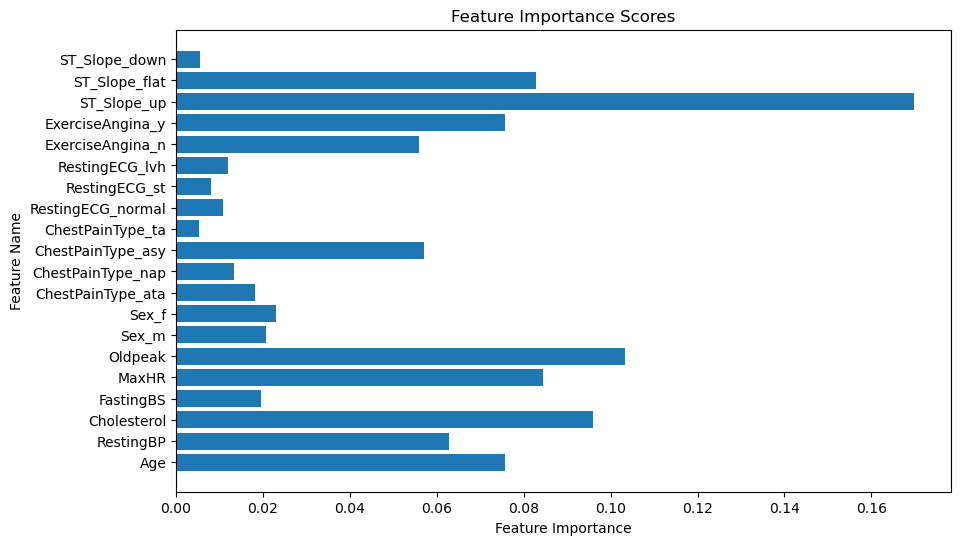

In [44]:
import matplotlib.pyplot as plt

# Feature names (column names)
feature_names = X.columns

# Feature importance scores
feature_importance = rf_classifier.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores')
plt.show()

Here are the percentages of feature importance for each feature based on the provided feature importance scores. These percentages indicate the relative importance of each feature in making predictions. Features with higher percentages are considered more important in the model's decision-making process.

1. 'Age': 7.58%
2. 'RestingBP': 6.27%
3. 'Cholesterol': 9.60%
4. 'FastingBS': 1.94%
5. 'MaxHR': 8.46%
6. 'Oldpeak': 10.34%
7. 'Sex_m': 2.07%
8. 'Sex_f': 2.29%
9. 'ChestPainType_ata': 1.82%
10. 'ChestPainType_nap': 1.33%
11. 'ChestPainType_asy': 5.71%
12. 'ChestPainType_ta': 0.52%
13. 'RestingECG_normal': 1.07%
14. 'RestingECG_st': 0.81%
15. 'RestingECG_lvh': 1.19%
16. 'ExerciseAngina_n': 5.59%
17. 'ExerciseAngina_y': 7.56%
18. 'ST_Slope_up': 16.98%
19. 'ST_Slope_flat': 8.29%
20. 'ST_Slope_down': 0.56%

SAME LIST - Descending

1. 'ST_Slope_up': 16.98%
2. 'Oldpeak': 10.34%
3. 'Cholesterol': 9.60%
4. 'ST_Slope_flat': 8.29%
5. 'MaxHR': 8.46%
6. 'Age': 7.58%
7. 'ExerciseAngina_y': 7.56%
8. 'RestingBP': 6.27%
9. 'ChestPainType_asy': 5.71%
10. 'ExerciseAngina_n': 5.59%
11. 'Sex_m': 2.07%
12. 'Sex_f': 2.29%
13. 'RestingECG_lvh': 1.19%
14. 'RestingECG_st': 0.81%
15. 'ChestPainType_ata': 1.82%
16. 'ChestPainType_ta': 0.52%
17. 'FastingBS': 1.94%
18. 'RestingECG_normal': 1.07%
19. 'ChestPainType_nap': 1.33%
20. 'ST_Slope_down': 0.56%

# Report

1. **Accuracy:** The model achieved an accuracy of approximately 88.59%. This metric represents the overall proportion of correctly predicted instances out of the total predictions.

2. **Classification Report:**
   - Precision: Precision measures the proportion of true positive predictions (correctly predicted positive cases) out of all positive predictions. In this case, it's approximately 86% for class 0 and 91% for class 1.
   - Recall: Recall (or sensitivity) measures the proportion of true positive predictions out of all actual positives. It's around 87% for class 0 and 90% for class 1.
   - F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It's approximately 0.86 for class 0 and 0.90 for class 1.
   - Support: Support indicates the number of instances in each class. There are 77 instances of class 0 and 107 instances of class 1.

3. **Confusion Matrix:** The confusion matrix shows the model's performance in a tabular format.
   - True Negative (TN): 67 cases were correctly predicted as class 0.
   - False Positive (FP): 10 cases were incorrectly predicted as class 1.
   - False Negative (FN): 11 cases were incorrectly predicted as class 0.
   - True Positive (TP): 96 cases were correctly predicted as class 1.

4. **Feature Importance:** The feature importance scores indicate the contribution of each feature in making predictions. Higher scores mean more important features. 

In summary, Random Forest Classifier achieved a good level of accuracy, and it performs well in terms of precision, recall, and F1-score for both classes. The confusion matrix shows a relatively low number of false predictions. Feature importance analysis highlights which features are most influential in making predictions, providing insights into the factors that contribute to the model's decision-making.